#Clothes classification with Convolutional Neural Network (Deep Learning)
Óscar Poblete Sáenz <br>
Course: Introduction to Artificial Intelligence<br>
Teacher: Elizabeth Guevara Martinez<br>
Universidad Anáhuac <br>
Note: In the case of this network the input consists of digitally processed images <br>
#Classes 

0 T-shirt/top<br>
1 Trouser<br>
2 Pullover<br>
3 Dress<br>
4 Coat<br>
5 Sandal<br>
6 Shirt<br>
7 Sneaker<br>
8 Bag<br>
9 Ankle boot<br>

#To consider:
Each row is a separate image <br>
Column 1 is the class label. <br>
The remaining columns are pixel numbers (784 total).<br>
Each value is the pixel darkness (1 to 255)<br>

#Sources: 

The original dataset was downloaded from: https://github.com/zalandoresearch/fashion-mnist

The data set was converted to CSV with this script: https://pjreddie.com/projects/mnist-in-csv/

In [ ]:
# Import libraries
import numpy as np # Linear algebra
import pandas as pd # Data analysis and manipulation
import matplotlib.pyplot as plt # Graph
import keras # Tensorflow interface
from keras.models import Sequential # Define DNN
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten # Conv2D is used for convolution, MaxPooling2D to reduce dimensions,
# Dense is the MLP, Dropout to avoid overfitting, and Flatten transforms the image to a vector.
from tensorflow.keras.optimizers import Adam # Optimizer
from sklearn.model_selection import train_test_split # Train and test split
from sklearn.metrics import confusion_matrix # Confusion matrix

In [ ]:
# Use data split between test and training to obtain a new validation set that will avoid overfitting.
train_df=pd.read_csv('fashion-mnist_train.csv')
test_df=pd.read_csv('fashion-mnist_test.csv')

In [ ]:
# Show some training data
train_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Show some test data
test_df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


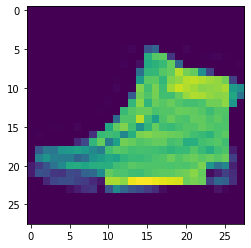

In [ ]:
# Convert data to floats
train_data=np.array(train_df,dtype='float32')
test_data=np.array(test_df,dtype='float32')

# Separate the values from the training set
x_train=train_data[:,1:]/255 # It is already an array, there is no need to use iloc. Save all the values except labels
# Dividing the values by 255 will convert to ranges from 0 to 1
y_train=train_data[:,0] # Save labels

# Same for test set
x_test= test_data[:,1:]/255
y_test=test_data[:,0]

# Split between training and validation set with seed
x_train, x_validate, y_train, y_validate=train_test_split(x_train,y_train,test_size=0.2, random_state=1)

# Adjust dimensions of the vector. from 784 to 28
image=x_train[10,:].reshape((28,28)) # Select an image to display

# Show image
plt.imshow(image)


In [ ]:
# Verify data size 
x_train.shape

(48000, 784)

In [ ]:
# Convert to images
im_rows=28
im_cols=28

# The pixels are in a row, we need to put them as a matrix.
x_train=x_train.reshape(x_train.shape[0],im_rows,im_cols, 1) # A single dimension due to the gray scale, if it were in color it would be 3
x_test=x_test.reshape(x_test.shape[0],im_rows,im_cols,1)
x_validate=x_validate.reshape(x_validate.shape[0],im_rows,im_cols,1)

# Check
print("Train:",x_train.shape)
print("Test:",x_test.shape)
print("Validate:",x_validate.shape)

Train: (48000, 28, 28, 1)
Test: (10000, 28, 28, 1)
Validate: (12000, 28, 28, 1)


In [ ]:
# CNN model
# Define the network architecture
cnn_model=Sequential([
    Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=(im_rows,im_cols,1)), # For filters, powers of 2 are normally used
    MaxPooling2D(pool_size=2),# Reduce dimensions to 2x2
    Dropout(0.2), # Eliminate neurons randomly to avoid overfitting
    Flatten(), # Convert image to vector, the perceptron receives vectors not images
    Dense(32,activation='relu'), # MLP (layers in Hidden layer, activation function)
    Dense(10,activation='softmax') #In the last layer the number of neurons in the hidden layer must match the number of classes
    # Softmax defines the probability vector
    # Recommendation to know activation functions in neural networks: https://rubialesalberto.medium.com/explicaci%C3%B3n-funciones-de-activaci%C3%B3n-y-pr%C3%A1ctica-con-python-5807085c6ed3
])

In [ ]:
# Define the compile parameters
cnn_model.compile(loss='sparse_categorical_crossentropy', # Cross entropy, there are multiple classes
                  optimizer=Adam(learning_rate=0.001), # It goes between 0 and 1, provides information about the size of the steps
                  metrics=['accuracy']) # Calculates the frequency with which predictions equal labels

In [ ]:
# Train model
np.random.seed(1) # Random weights
cnn_model.fit(
    x_train,y_train,batch_size=512, # Inputs are divided into groups with batch_size. It is used because it can work in parallel
    epochs=10, verbose=1,
    validation_data=(x_validate,y_validate)
)

# Tip: Use GPU to speed up training

Epoch 1/10
94/94 [==============================] - 13s 19ms/step - loss: 0.7988 - accuracy: 0.7341 - val_loss: 0.4999 - val_accuracy: 0.8202
Epoch 2/10
94/94 [==============================] - 1s 15ms/step - loss: 0.4430 - accuracy: 0.8435 - val_loss: 0.4176 - val_accuracy: 0.8528
Epoch 3/10
94/94 [==============================] - 1s 9ms/step - loss: 0.3903 - accuracy: 0.8630 - val_loss: 0.3809 - val_accuracy: 0.8681
Epoch 4/10
94/94 [==============================] - 1s 9ms/step - loss: 0.3542 - accuracy: 0.8759 - val_loss: 0.3477 - val_accuracy: 0.8807
Epoch 5/10
94/94 [==============================] - 1s 9ms/step - loss: 0.3363 - accuracy: 0.8817 - val_loss: 0.3395 - val_accuracy: 0.8818
Epoch 6/10
94/94 [==============================] - 1s 9ms/step - loss: 0.3193 - accuracy: 0.8877 - val_loss: 0.3230 - val_accuracy: 0.8871
Epoch 7/10
94/94 [==============================] - 1s 9ms/step - loss: 0.3024 - accuracy: 0.8925 - val_loss: 0.3136 - val_accuracy: 0.8894
Epoch 8/10
94/94 

In [ ]:
# Evaluation of results
score=cnn_model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.2858 - accuracy: 0.8976


In [ ]:
# Prediction
y_preds=cnn_model.predict(x_test)
# The result is given in probabilities so we take the maximum to return the prediction with the class index
y_preds=np.argmax(y_preds,axis=1) # Axis=1 for each vector
y_preds

313/313 [==============================] - 1s 2ms/step


array([0, 1, 2, ..., 8, 8, 1])

In [ ]:
# Confusion matrix
confusionM=confusion_matrix(y_test,y_preds) # Comparison
confusionM

array([[904,   1,  17,  16,   7,   1,  46,   0,   8,   0],
       [  2, 983,   3,   7,   0,   2,   3,   0,   0,   0],
       [ 16,   1, 822,  10, 118,   0,  31,   0,   2,   0],
       [ 30,  11,   8, 895,  35,   0,  19,   0,   2,   0],
       [  1,   0,  30,  19, 922,   0,  27,   0,   1,   0],
       [  0,   1,   0,   0,   0, 966,   0,  18,   2,  13],
       [184,   3,  66,  18, 120,   0, 601,   0,   8,   0],
       [  0,   0,   0,   0,   0,  11,   0, 943,   0,  46],
       [  4,   2,   5,   1,   4,   6,   5,   3, 968,   2],
       [  0,   0,   0,   0,   0,   4,   0,  24,   0, 972]])

In [ ]:
# Save model
cnn_model.save('modelFashion.h5') # Format with which Keras models are saved